<a href="https://colab.research.google.com/github/BahaaSaeed92/Car-Insurance-Data-project-4-/blob/main/project_4_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd
url ="/content/drive/MyDrive/AXSOSACADEMY/05-IntermediateML/Week19/Data/Car_Insurance_Claim.csv"
df = pd.read_csv(url)
df.head ()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [16]:
df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [17]:
print(df.isnull().sum())

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64


In [18]:
import pandas as pd
import os
import csv
import seaborn as sn
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import matplotlib.pyplot as plt

<Axes: xlabel='AGE', ylabel='Count'>

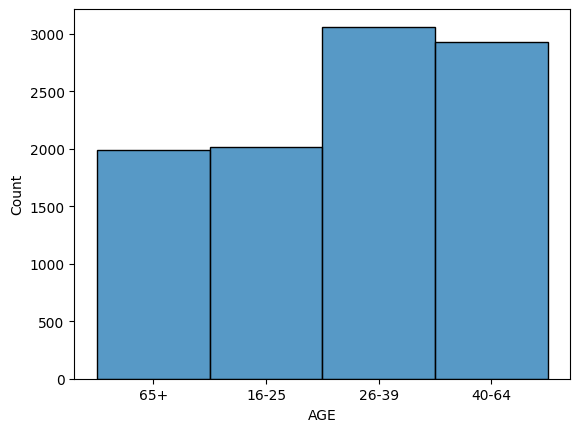

In [19]:
import seaborn as sns
sns.histplot(df['AGE'])

In [20]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

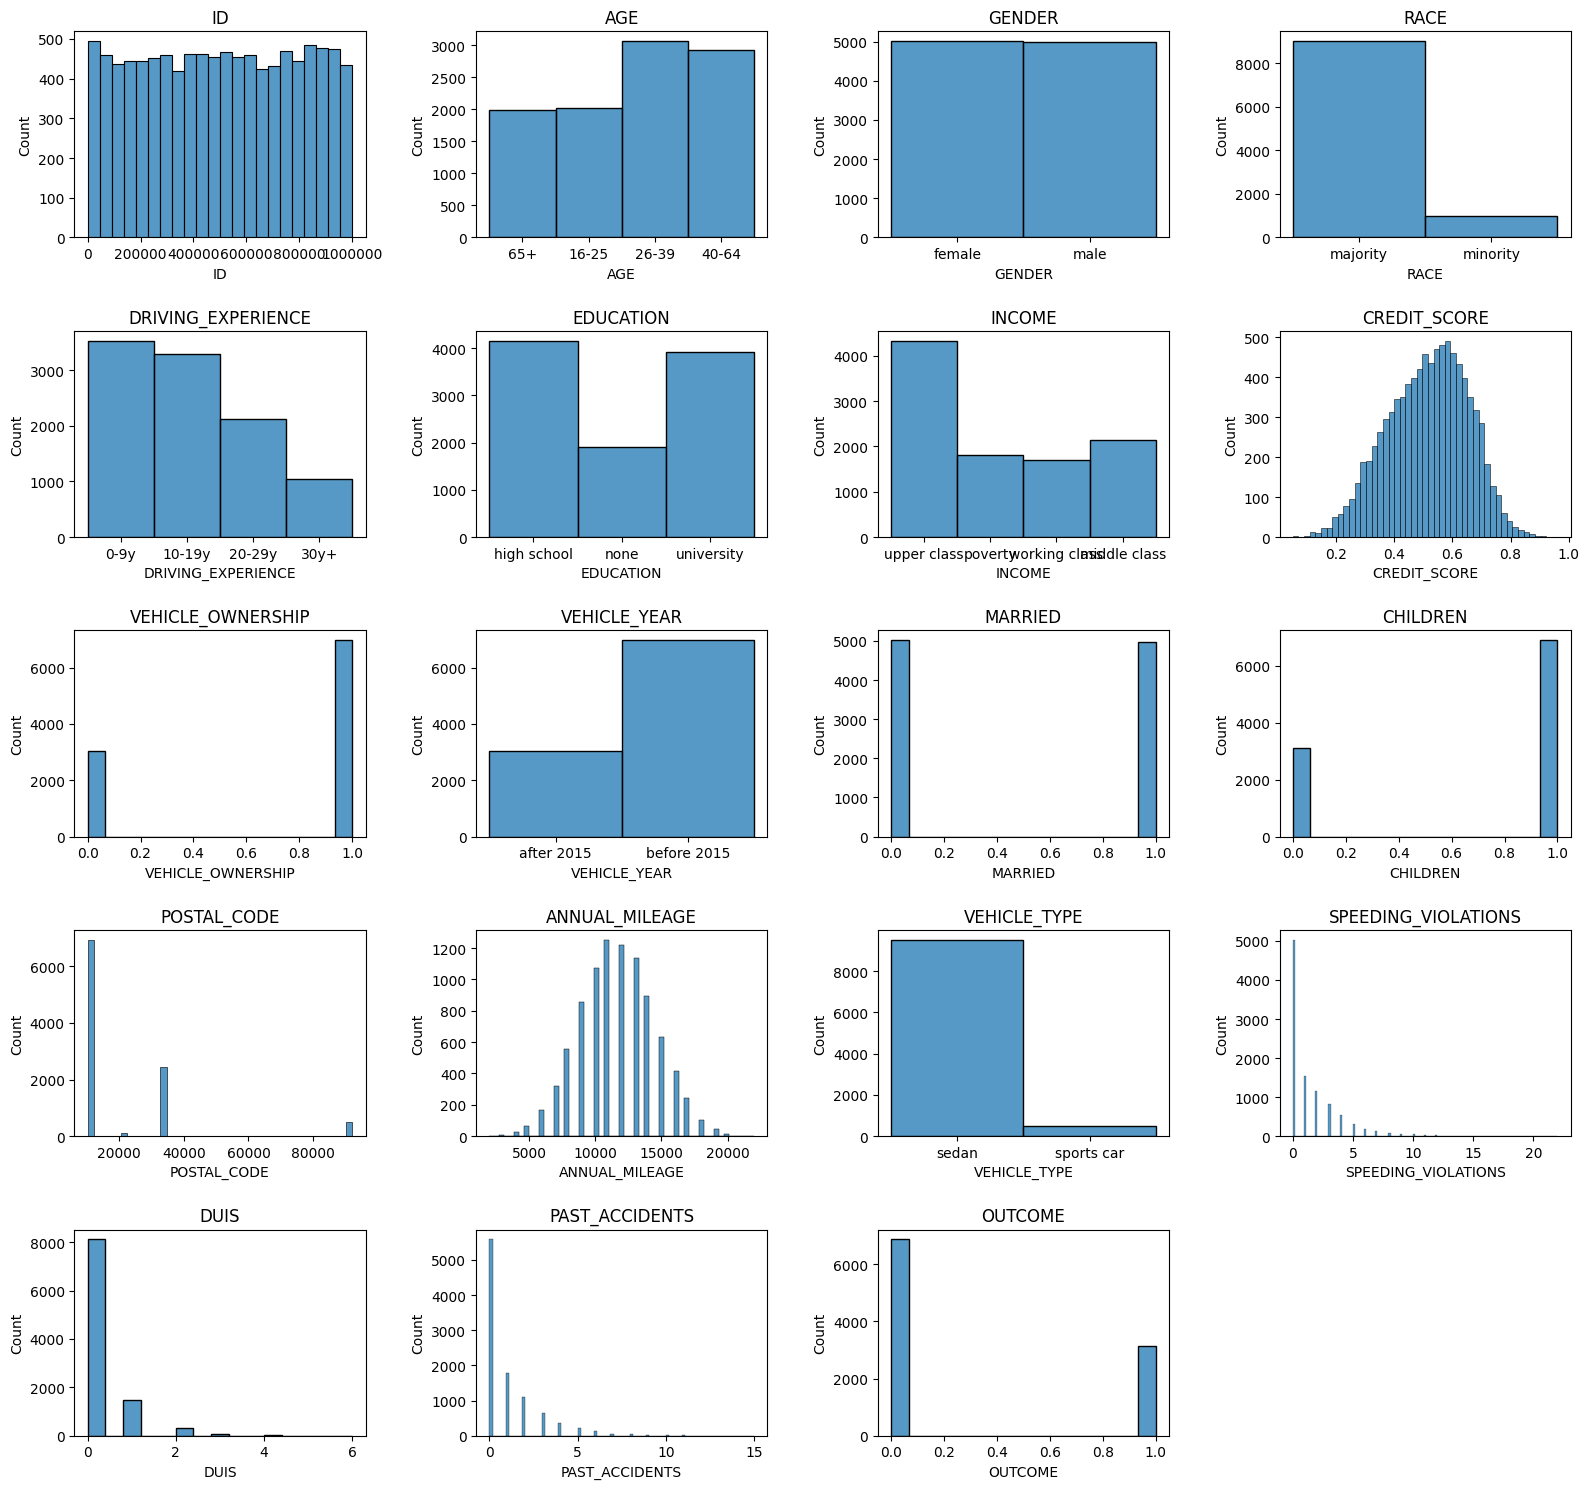

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

n_cols = len(df.columns)
# Determine number of rows and columns for subplots
ncols_per_row = 4
num_rows = math.ceil(n_cols / ncols_per_row)

# Create subplots with a calculated grid size
fig, axes = plt.subplots(num_rows, ncols_per_row, figsize=(ncols_per_row * 4, num_rows * 3))
# Flatten axes for easy iteration, handling cases where num_rows or ncols_per_row is 1
ax = axes.flatten()

for i, col in enumerate(df.columns):
    # Plot histogram for each column
    sns.histplot(df[col], ax=ax[i])
    ax[i].set_title(col)
    # Only apply ticklabel_format if the column is numerical
    if np.issubdtype(df[col].dtype, np.number):
        ax[i].ticklabel_format(style='plain', axis='both')

# Hide any unused subplots if the number of columns is not a perfect multiple of ncols_per_row
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

fig.tight_layout(w_pad=2, h_pad=2) # change padding to prevent labels from overlapping
plt.show()

In [24]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['ID', 'OUTCOME'], errors='ignore').copy()
y = df['OUTCOME']
numerical_cols = X.select_dtypes(include=['number']).columns
for col in numerical_cols:
    if X[col].isnull().any():
        X[col] = X[col].fillna(X[col].mean())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_cols])

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [28]:
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
pca_df = pd.DataFrame(data=X_pca, columns=component_names)
pca_df['OUTCOME'] = y
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,OUTCOME
0,-0.414839,-0.603404,-1.169693,0.233438,-0.081523,1.187424,0.577812,0.387711,-0.270660,0.0
1,-2.990430,1.006560,0.418070,-0.490653,0.199529,-0.512426,0.194099,-0.006932,0.353989,1.0
2,-1.392763,0.022625,-0.744111,0.413806,-0.137995,-0.223909,-0.650240,0.978433,-0.956579,0.0
3,-1.222173,-0.683529,1.060620,-0.061846,-0.891352,1.507344,-1.676703,-0.277024,-0.119382,0.0
4,-1.142640,0.531847,0.374838,0.990472,-1.040302,-0.400777,-0.963906,0.481502,-0.441981,1.0


In [30]:
loadings = pd.DataFrame(pca.components_.T, columns=component_names, index=numerical_cols)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
CREDIT_SCORE,0.315454,-0.114719,-0.450041,0.313426,0.182059,-0.130033,0.707390,0.134629,-0.134079
VEHICLE_OWNERSHIP,0.235990,-0.076397,-0.551263,0.447039,-0.243013,0.219494,-0.571181,0.005360,-0.035035
MARRIED,0.392216,-0.313652,-0.064318,-0.172179,0.321406,-0.561450,-0.246442,-0.321265,0.362676
CHILDREN,0.371118,-0.299359,0.066122,-0.270697,-0.061201,0.710951,0.197271,-0.261022,0.280646
POSTAL_CODE,0.051878,-0.261553,0.565561,0.669489,-0.185853,-0.075481,0.084772,-0.332510,-0.053253


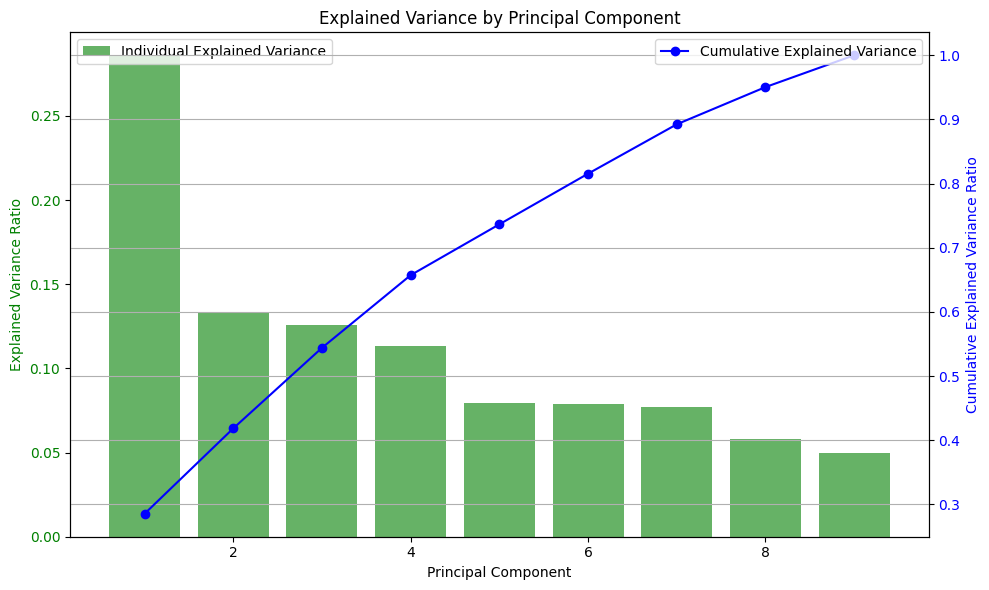

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def plot_variance(pca_model):
    """
    Plots the explained variance ratio and cumulative explained variance ratio
    for a PCA model.

    Args:
        pca_model: A fitted sklearn.decomposition.PCA object.
    """
    explained_variance_ratio = pca_model.explained_variance_ratio_
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)

    fig, ax1 = plt.subplots(figsize=(10, 6))


    ax1.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio,
            alpha=0.6, color='g', label='Individual Explained Variance')
    ax1.set_xlabel('Principal Component')
    ax1.set_ylabel('Explained Variance Ratio', color='g')
    ax1.tick_params(axis='y', labelcolor='g')
    ax1.set_title('Explained Variance by Principal Component')


    ax2 = ax1.twinx()
    ax2.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance,
             marker='o', linestyle='-', color='b', label='Cumulative Explained Variance')
    ax2.set_ylabel('Cumulative Explained Variance Ratio', color='b')
    ax2.tick_params(axis='y', labelcolor='b')

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    fig.tight_layout()
    plt.grid(True)
    plt.show()

plot_variance(pca)

In [35]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])]), y, discrete_features=False)
mi_scores

,MI Scores
PC1,0.118530
PC3,0.046677
PC5,0.031007
PC6,0.028176
PC2,0.017384
PC9,0.014897
PC8,0.012942
PC4,0.010380
PC7,0.010350


In [41]:
idx = pca_df["PC3"].sort_values(ascending=False).index
cols = ["PC3", "PC4", "PC5"] # Corrected to use PC5 assuming the intention was to select PC5
pca_df.loc[idx, cols]

,PC3,PC4,PC5
9812,4.312781,0.508712,2.502826
7477,4.204752,1.033759,0.695147
2955,4.168199,1.190515,-2.422683
9726,4.150598,0.967738,-0.910044
7444,4.092615,1.701259,-0.100027
...,...,...,...
6412,-2.298546,1.547108,0.243158
242,-2.319623,1.127838,0.842461
9234,-2.429611,1.394977,-0.743772
382,-2.488872,1.500522,0.112489
